In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)
tensorflow.compat.v1.disable_eager_execution()

2.4.0


In [3]:
path = "/Users/k15/Downloads/cifar-10-batches-py/"

In [4]:
!ls -la /Users/k15/Downloads/cifar-10-batches-py/

total 363752
drwxr-xr-x@  10 k15  749149485       320 Jun  5  2009 .
drwx------+ 279 k15  749149485      8928 Feb  2 22:25 ..
-rw-r--r--@   1 k15  749149485       158 Mar 31  2009 batches.meta
-rw-r--r--@   1 k15  749149485  31035704 Mar 31  2009 data_batch_1
-rw-r--r--@   1 k15  749149485  31035320 Mar 31  2009 data_batch_2
-rw-r--r--@   1 k15  749149485  31035999 Mar 31  2009 data_batch_3
-rw-r--r--@   1 k15  749149485  31035696 Mar 31  2009 data_batch_4
-rw-r--r--@   1 k15  749149485  31035623 Mar 31  2009 data_batch_5
-rw-r--r--@   1 k15  749149485        88 Jun  5  2009 readme.html
-rw-r--r--@   1 k15  749149485  31035526 Mar 31  2009 test_batch


In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

results = []

for file in files:
    result = unpickle(path + file)
    results.append(result)

In [7]:
len(results)

5

In [8]:
results[0].keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [9]:
results[0][b'data'].shape

(10000, 3072)

In [10]:
datas = np.vstack([results[0][b'data'], results[1][b'data'],results[2][b'data'],results[3][b'data'],results[4][b'data']])
datas.shape

(50000, 3072)

In [11]:
train_images = []
for i in range(0, len(datas)):
    img = datas[i]
    img = np.reshape(img, (3, 32, 32))
    img = np.swapaxes(img, 1, 2)
    img = np.swapaxes(img, 0, 2)
    train_images.append(img)
train_images = np.array(train_images)

In [12]:
tb = unpickle(path + 'test_batch')
datas = tb[b'data']

test_images = []
for i in range(0, len(datas)):
    img = datas[i]
    img = np.reshape(img, (3, 32, 32))
    img = np.swapaxes(img, 1, 2)
    img = np.swapaxes(img, 0, 2)
    test_images.append(img)
test_images = np.array(test_images)

In [13]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [14]:
train_labels = np.hstack([results[0][b'labels'], results[1][b'labels'],results[2][b'labels'],results[3][b'labels'],results[4][b'labels']])
train_labels.shape

(50000,)

In [15]:
tb.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [16]:
test_labels = np.array(tb[b'labels'])
test_labels.shape

(10000,)

Training data shapes: X=(50000, 32, 32, 3), y=(50000,)
Testing data shapes: X=(10000, 32, 32, 3), y=(10000,)


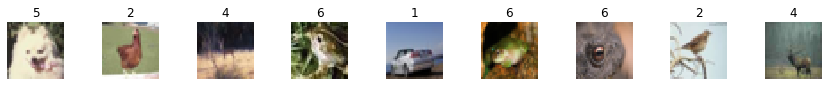

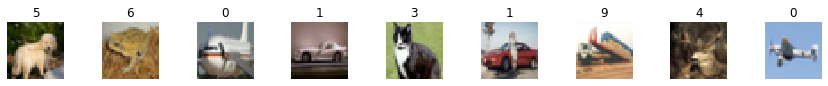

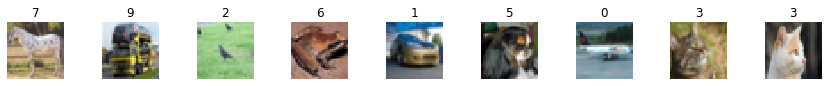

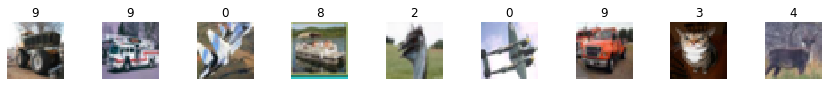

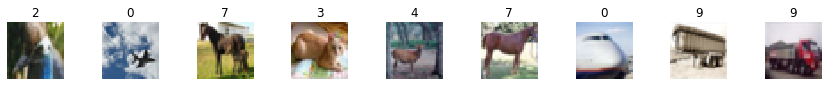

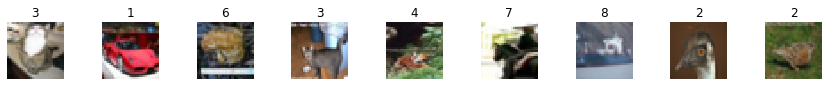

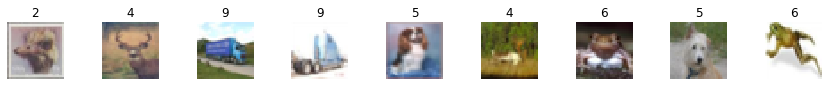

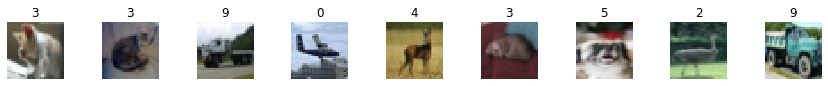

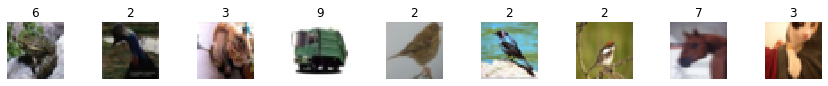

In [17]:
from tensorflow.keras.datasets import fashion_mnist, mnist

trainX, trainY, testX, testY = train_images, train_labels, test_images, test_labels

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))


for k in range(9):
    plt.figure(figsize=(15, 11))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
        plt.title(trainY[i])
    plt.show()

In [18]:
trainX = np.array(trainX)/255.0
testX = np.array(testX)/255.0

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [57]:
from collections import Counter
Counter(trainY[:500])

Counter({0: 51, 1: 65, 2: 43, 3: 47, 4: 50, 5: 40, 6: 53, 7: 50, 8: 45, 9: 56})

In [20]:
train_full_X = trainX
train_full_Y = trainY

In [56]:
train_part_X = trainX[:500]
train_part_Y = trainY[:500]

# Normal small model

In [58]:
inp = tensorflow.keras.layers.Input(shape=(32, 32, 3))

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=2)(inp)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', strides=2)(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, strides=2)(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=256, kernel_size=3)(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Flatten()(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)

out = tensorflow.keras.layers.Dense(10, activation='softmax')(x)

In [59]:
model = tensorflow.keras.models.Model(inputs=inp, outputs=out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        1792      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
activation_5 (Activation)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
activation_6 (Activation)    (None, 3, 3, 128)         0  

In [60]:
model.fit(train_part_X, train_part_Y, batch_size=64, epochs=50, validation_data=(testX, testY), verbose=1)

Train on 500 samples, validate on 10000 samples
Epoch 1/50
448/500 [=========================>....] - ETA: 0s - loss: 2.2964 - accuracy: 0.1049

/Users/k15/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


500/500 [==============================] - 1s 2ms/sample - loss: 2.2991 - accuracy: 0.1000 - val_loss: 2.2946 - val_accuracy: 0.1001
Epoch 2/50
500/500 [==============================] - 1s 2ms/sample - loss: 2.2647 - accuracy: 0.1520 - val_loss: 2.2367 - val_accuracy: 0.1509
Epoch 3/50
500/500 [==============================] - 1s 2ms/sample - loss: 2.1329 - accuracy: 0.2340 - val_loss: 2.1117 - val_accuracy: 0.2181
Epoch 4/50
500/500 [==============================] - 1s 2ms/sample - loss: 1.9898 - accuracy: 0.2880 - val_loss: 2.0610 - val_accuracy: 0.2585
Epoch 5/50
500/500 [==============================] - 1s 2ms/sample - loss: 1.9197 - accuracy: 0.2760 - val_loss: 2.0335 - val_accuracy: 0.2636
Epoch 6/50
500/500 [==============================] - 1s 2ms/sample - loss: 1.8626 - accuracy: 0.3220 - val_loss: 2.0112 - val_accuracy: 0.2792
Epoch 7/50
500/500 [==============================] - 1s 2ms/sample - loss: 1.7597 - accuracy: 0.3480 - val_loss: 1.9545 - val_accuracy: 0.2953
Epo

In [25]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

# teacher model

In [26]:
image_input = tensorflow.keras.layers.Input(shape=(32, 32, 3))

pre_trained_vgg = tensorflow.keras.applications.vgg19.VGG19(weights='imagenet', input_shape=(32, 32, 3), include_top=False)
pre_trained_vgg_model = tensorflow.keras.models.Model(inputs=pre_trained_vgg.input, outputs=pre_trained_vgg.get_layer('block5_pool').output)

pre_trained_image_feautures = pre_trained_vgg_model(image_input)

custom_vgg = tensorflow.keras.models.Model(inputs=image_input, outputs=pre_trained_image_feautures)
print (custom_vgg.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
model_1 (Functional)         (None, 1, 1, 512)         20024384  
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
new_full_y = custom_vgg.predict(train_full_X)
new_full_y.shape

/Users/k15/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(50000, 1, 1, 512)

In [28]:
new_test_y = custom_vgg.predict(testX)
new_test_y.shape

(10000, 1, 1, 512)

In [61]:
new_part_y = custom_vgg.predict(train_part_X)
new_part_y.shape

(500, 1, 1, 512)

# transfer learning results

In [66]:
inp = tensorflow.keras.layers.Input(shape=(1, 1, 512))
x = tensorflow.keras.layers.Flatten()(inp)
out = tensorflow.keras.layers.Dense(10, activation='softmax')(x)

transfer = tensorflow.keras.models.Model(inputs=inp, outputs=out)
transfer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
transfer.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 1, 1, 512)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5130      
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


In [69]:
transfer.fit(new_part_y, train_part_Y, batch_size=64, epochs=100, validation_data=(new_test_y, testY))

Train on 500 samples, validate on 10000 samples
Epoch 1/100
500/500 [==============================] - 0s 278us/sample - loss: 0.4644 - accuracy: 0.9320 - val_loss: 1.7893 - val_accuracy: 0.4245
Epoch 2/100
500/500 [==============================] - 0s 239us/sample - loss: 0.4620 - accuracy: 0.9360 - val_loss: 1.7888 - val_accuracy: 0.4236
Epoch 3/100
500/500 [==============================] - 0s 225us/sample - loss: 0.4604 - accuracy: 0.9440 - val_loss: 1.7903 - val_accuracy: 0.4243
Epoch 4/100
500/500 [==============================] - 0s 242us/sample - loss: 0.4577 - accuracy: 0.9440 - val_loss: 1.7902 - val_accuracy: 0.4251
Epoch 5/100
500/500 [==============================] - 0s 231us/sample - loss: 0.4557 - accuracy: 0.9360 - val_loss: 1.7912 - val_accuracy: 0.4254
Epoch 6/100
500/500 [==============================] - 0s 219us/sample - loss: 0.4535 - accuracy: 0.9440 - val_loss: 1.7952 - val_accuracy: 0.4239
Epoch 7/100
500/500 [==============================] - 0s 248us/sample

500/500 [==============================] - 0s 205us/sample - loss: 0.3621 - accuracy: 0.9600 - val_loss: 1.8639 - val_accuracy: 0.4220
Epoch 57/100
500/500 [==============================] - 0s 208us/sample - loss: 0.3612 - accuracy: 0.9600 - val_loss: 1.8654 - val_accuracy: 0.4205
Epoch 58/100
500/500 [==============================] - 0s 205us/sample - loss: 0.3591 - accuracy: 0.9600 - val_loss: 1.8690 - val_accuracy: 0.4207
Epoch 59/100
500/500 [==============================] - 0s 214us/sample - loss: 0.3579 - accuracy: 0.9580 - val_loss: 1.8705 - val_accuracy: 0.4207
Epoch 60/100
500/500 [==============================] - 0s 196us/sample - loss: 0.3558 - accuracy: 0.9600 - val_loss: 1.8711 - val_accuracy: 0.4215
Epoch 61/100
500/500 [==============================] - 0s 190us/sample - loss: 0.3543 - accuracy: 0.9580 - val_loss: 1.8729 - val_accuracy: 0.4209
Epoch 62/100
500/500 [==============================] - 0s 190us/sample - loss: 0.3531 - accuracy: 0.9600 - val_loss: 1.8725 

# student

In [85]:
inp = tensorflow.keras.layers.Input(shape=(32, 32, 3))
x = tensorflow.keras.layers.Flatten()(inp)
#x = tensorflow.keras.layers.Dense(1024, activation='relu')(x)
#x = tensorflow.keras.layers.Dense(784, activation='relu')(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
features = tensorflow.keras.layers.Reshape((1, 1, 512))(x)

In [86]:
student = tensorflow.keras.models.Model(inputs = inp, outputs = features)
student.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
student.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_43 (Dense)             (None, 512)               66048     
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 1, 512)         0         
Total params: 459,392
Trainable params: 459,392
Non-trainable params: 0
_________________________________________________________________


In [87]:
student.fit(train_full_X, new_full_y, batch_size=64, epochs=50, validation_data=(testX, new_test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
49664/50000 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.9961

/Users/k15/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 4s 84us/sample - loss: 0.0893 - accuracy: 0.9961 - val_loss: 0.0783 - val_accuracy: 1.0000
Epoch 2/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.0737 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 1.0000
Epoch 3/50
50000/50000 [==============================] - 4s 82us/sample - loss: 0.0665 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 4/50
50000/50000 [==============================] - 4s 80us/sample - loss: 0.0632 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 5/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 6/50
50000/50000 [==============================] - 4s 80us/sample - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 7/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.0600 - accuracy: 1.0000 - val_loss

KeyboardInterrupt: 

In [88]:
student_part_y = student.predict(train_part_X)
student_test_y = student.predict(testX)
student_part_y.shape,  student_test_y.shape

/Users/k15/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


((500, 1, 1, 512), (10000, 1, 1, 512))

# transfer learning  with student

In [89]:
inp = tensorflow.keras.layers.Input(shape=(1, 1, 512))
x = tensorflow.keras.layers.Flatten()(inp)
out = tensorflow.keras.layers.Dense(10, activation='softmax')(x)

transfer = tensorflow.keras.models.Model(inputs=inp, outputs=out)
transfer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
transfer.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 1, 1, 512)]       0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                5130      
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


In [94]:
transfer.fit(student_part_y, train_part_Y, batch_size=64, epochs=100, validation_data=(student_test_y, testY))

Train on 500 samples, validate on 10000 samples
Epoch 1/100
500/500 [==============================] - 0s 282us/sample - loss: 1.4489 - accuracy: 0.5220 - val_loss: 1.8483 - val_accuracy: 0.3410
Epoch 2/100
500/500 [==============================] - 0s 262us/sample - loss: 1.4472 - accuracy: 0.5160 - val_loss: 1.8508 - val_accuracy: 0.3405
Epoch 3/100
500/500 [==============================] - 0s 240us/sample - loss: 1.4492 - accuracy: 0.5160 - val_loss: 1.8513 - val_accuracy: 0.3378
Epoch 4/100
500/500 [==============================] - 0s 235us/sample - loss: 1.4477 - accuracy: 0.5180 - val_loss: 1.8520 - val_accuracy: 0.3405
Epoch 5/100
500/500 [==============================] - 0s 240us/sample - loss: 1.4478 - accuracy: 0.5140 - val_loss: 1.8512 - val_accuracy: 0.3423
Epoch 6/100
500/500 [==============================] - 0s 256us/sample - loss: 1.4484 - accuracy: 0.5120 - val_loss: 1.8511 - val_accuracy: 0.3420
Epoch 7/100
500/500 [==============================] - 0s 243us/sample

500/500 [==============================] - 0s 218us/sample - loss: 1.4305 - accuracy: 0.5260 - val_loss: 1.8590 - val_accuracy: 0.3400
Epoch 57/100
500/500 [==============================] - 0s 238us/sample - loss: 1.4306 - accuracy: 0.5220 - val_loss: 1.8575 - val_accuracy: 0.3406
Epoch 58/100
500/500 [==============================] - 0s 203us/sample - loss: 1.4280 - accuracy: 0.5100 - val_loss: 1.8565 - val_accuracy: 0.3419
Epoch 59/100
500/500 [==============================] - 0s 236us/sample - loss: 1.4281 - accuracy: 0.5160 - val_loss: 1.8559 - val_accuracy: 0.3414
Epoch 60/100
500/500 [==============================] - 0s 251us/sample - loss: 1.4296 - accuracy: 0.5200 - val_loss: 1.8603 - val_accuracy: 0.3389
Epoch 61/100
500/500 [==============================] - 0s 243us/sample - loss: 1.4280 - accuracy: 0.5220 - val_loss: 1.8576 - val_accuracy: 0.3413
Epoch 62/100
500/500 [==============================] - 0s 208us/sample - loss: 1.4270 - accuracy: 0.5280 - val_loss: 1.8568 